## setup

In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import time
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from PIL import Image

# show all dataframe
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_columns', None)  

## params

In [7]:
directory = 'test' # select the folder, no / at the end

## delete grayscale images

### prototype

In [2]:
directory = 'clean image/full_selection_sel' # select the folder
counter = 0

for filename in os.listdir(directory):
    r = directory + '/' + filename
    image = cv2.imread(r)
    (B, G, R) = cv2.split(image)

    if (B==G).all() == True:
        os.remove(r)
        counter += 1

print(f'{counter} grayscale images deleted.')

310 grayscale images deleted.


### define function

In [3]:
directory = 'clean image/full_selection_sel' # select the folder

def delete_gray_image_in_folder(directory):
    start = time.time() # start timer
    counter = 0 # handy counter for how many gracyscale images to be deleted

    for filename in os.listdir(directory):
        r = directory + '/' + filename
        image = cv2.imread(r)
        (B, G, R) = cv2.split(image)

        if (B==G).all() == True: # RBG channels are same for grayscales
            os.remove(r)
            counter += 1

    print(f'{counter} grayscale images deleted.')
    print(f'{time.time()-start} seconds slipped...') # print out the time spent

In [ ]:
# uncomment to use the fuction 
# directory = 'clean image/VA_sel' # select the folder
# delete_gray_image_in_folder(directory)

## checkout dimension of images

### prototype

In [3]:
# create dataframe of dimension of the images

# initialte a dataframe for dimension
keys = ['Object ID', 'width','height']
df_dim = pd.DataFrame(columns=keys)

# params
directory = 'clean image/full_selection_sel' # select the folder

# function
for filename in os.listdir(directory):
    r = directory + '/' + filename
    image = cv2.imread(r)
    new_row = {'Object ID':filename, 'width':image.shape[1],'height':image.shape[0]}
    new_row = pd.DataFrame(new_row,index=[0])
    df_dim = pd.concat([df_dim, new_row], ignore_index=True)

In [4]:
# clean the .jpg in df
df_dim['Object ID'] = df_dim['Object ID'].map(lambda x: x[:-4])

In [10]:
# create a list of our conditions
conditions = [
    df_dim['height'] / df_dim['width'] >=1.1,
    df_dim['height'] / df_dim['width'] <=0.9,
    (df_dim['height'] / df_dim['width'] >0.9) & (df_dim['height'] / df_dim['width'] <1.1) 
    ]

# create a list of the values we want to assign for each condition
values = ['vertical', 'horizontal', 'square']

# create a new column and use np.select to assign values to it using our lists as arguments
df_dim['ratio'] = np.select(conditions, values)

# display updated DataFrame
df_dim.head()

,Object ID,width,height,ratio
0,100017,991,1795,vertical
1,100019,1800,1898,square
2,100020,1440,2526,vertical
3,100021,1663,1960,vertical
4,100024,1225,2838,vertical


In [11]:
ra = df_dim['ratio'].value_counts()

In [22]:
ra.to_dict()

{'vertical': 2081, 'horizontal': 295, 'square': 189}

### define function

In [8]:
# directory = 'clean image/full_selection_sel' # select the folder

def dimension_df(directory):
    """return a dataframe"""
    """print out the dimension quantities"""

    # start timer
    start = time.time() # start timer

    # initialte a dataframe for dimension
    keys = ['Object ID', 'width','height']
    df_dim = pd.DataFrame(columns=keys)

    # function
    for filename in os.listdir(directory):
        r = directory + '/' + filename
        image = cv2.imread(r)
        new_row = {'Object ID':filename, 'width':image.shape[1],'height':image.shape[0]}
        new_row = pd.DataFrame(new_row,index=[0])
        df_dim = pd.concat([df_dim, new_row], ignore_index=True)

    # clean the .jpg in df
    df_dim['Object ID'] = df_dim['Object ID'].map(lambda x: x[:-4])

    # create a list of the conditions
    conditions = [
        df_dim['height'] > df_dim['width'],
        df_dim['height'] < df_dim['width'],
        df_dim['height'] == df_dim['width']
        ]

    # conditions for rough square
    # a rough square doesn't need to be cropped using other tools
    # if there are many rough square, it will save some processing time
    conditions2 = [
        df_dim['height'] / df_dim['width'] >=1.1,
        df_dim['height'] / df_dim['width'] <=0.9,
        (df_dim['height'] / df_dim['width'] >0.9) & (df_dim['height'] / df_dim['width'] <1.1) 
        ]

    # create a list of the values we want to assign for each condition
    values = ['vertical', 'horizontal', 'square']

    # create a new column and use np.select to assign values to it using our lists as arguments
    df_dim['ratio'] = np.select(conditions, values)
    df_dim['rough ratio'] = np.select(conditions2, values)

    # print out the numbers of vertical and horizontal images
    ra = df_dim['ratio'].value_counts().to_dict()
    ra2 = df_dim['rough ratio'].value_counts().to_dict()
    print(f'explict the square counts: {ra}')
    print(f'rough square counts: {ra2}')

    # timer stops
    print(f'{time.time()-start} seconds slipped...') # print out the time spent

    return df_dim

### checkout different folders/selection

In [9]:
# VA museum, selected keywords
dimension_df('clean image/VA_sel')

# mostly vertical

explict the square counts: {'vertical': 5557, 'horizontal': 1300, 'square': 138}
rough square counts: {'vertical': 5428, 'horizontal': 1154, 'square': 413}
106.93425917625427 seconds slipped...


,Object ID,width,height,ratio,rough ratio
0,O100677,2500,1875,horizontal,horizontal
1,O100690,512,768,vertical,vertical
2,O100699,567,768,vertical,vertical
3,O100805,370,768,vertical,vertical
4,O100872,1667,2500,vertical,vertical
...,...,...,...,...,...
6990,O98911,682,768,vertical,vertical
6991,O9915,1874,2500,vertical,vertical
6992,O99384,1667,2500,vertical,vertical
6993,O99551,2500,1667,horizontal,horizontal


In [10]:
# checkout met's asian clothes
dimension_df('clean image/met_asian_sel')

explict the square counts: {'horizontal': 118, 'vertical': 71}
rough square counts: {'horizontal': 111, 'vertical': 62, 'square': 16}
16.772913455963135 seconds slipped...


,Object ID,width,height,ratio,rough ratio
0,126312,1500,2111,vertical,vertical
1,126722,1250,2757,vertical,vertical
2,127542,1400,2418,vertical,vertical
3,39317,2000,1604,horizontal,horizontal
4,39747,3811,3049,horizontal,horizontal
...,...,...,...,...,...
184,88303,1227,2439,vertical,vertical
185,88308,1250,2757,vertical,vertical
186,88350,1800,1636,horizontal,square
187,93922,1425,2450,vertical,vertical


In [11]:
# met museum, seleted keywords
dimension_df('clean image/met_all_sel')

# mostly vertical, most asian clothes are horizontal

explict the square counts: {'vertical': 2175, 'horizontal': 370}
rough square counts: {'vertical': 2070, 'horizontal': 288, 'square': 187}
156.10705041885376 seconds slipped...


,Object ID,width,height,ratio,rough ratio
0,100017,991,1795,vertical,vertical
1,100019,1800,1898,vertical,square
2,100020,1440,2526,vertical,vertical
3,100021,1663,1960,vertical,vertical
4,100024,1225,2838,vertical,vertical
...,...,...,...,...,...
2540,98751,2949,3892,vertical,vertical
2541,99061,1850,1885,vertical,square
2542,99070,1500,2250,vertical,vertical
2543,99509,3000,4000,vertical,vertical


## 'semi-auto' delete unrelated images

In [14]:
df_va = pd.read_csv('scrapped_data\VA_all_sel.csv')

fashion illustration


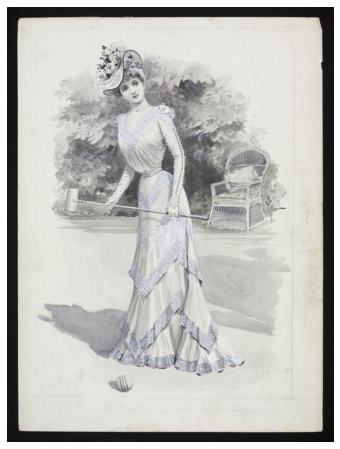

In [258]:
# use the following code
# to filter out more object types
image_number = 'O711715'

img = df_va[df_va['systemNumber']==image_number]
object_type = img['objectType'].to_string(index=False)
print(object_type)

dir = 'clean image/va_sel/'
filepath = dir + image_number + '.jpg'
img = Image.open(filepath)

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(img)
plt.show()

In [259]:
object_type

'fashion illustration'

In [260]:
df_va[df_va['objectType']==object_type]

,systemNumber,accessionNumber,objectType,_currentLocation,_primaryTitle,_primaryMaker,_primaryImageId,_primaryDate,_primaryPlace,_warningTypes,_images,image_value,image_base
968,O711722,E.3571-1914,fashion illustration,"{'id': 'THES49171', 'displayName': 'Prints & Drawings Study Room, level C', 'type': 'display', 'site': 'VA', 'onDisplay': True, 'detail': {'free': '', 'case': 'GG', 'shelf': '81', 'box': ''}}",A Handsome Evening Dress,"{'name': 'Albert, V.', 'association': 'artist'}",2015HM1787,1899,Britain,[],"{'_primary_thumbnail': 'https://framemark.vam.ac.uk/collections/2015HM1787/full/!100,100/0/default.jpg', '_iiif_image_base_url': 'https://framemark.vam.ac.uk/collections/2015HM1787/', '_iiif_presentation_url': None, 'imageResolution': 'low'}","dict_values(['https://framemark.vam.ac.uk/collections/2015HM1787/full/!100,100/0/default.jpg', 'https://framemark.vam.ac.uk/collections/2015HM1787/', None, 'low'])",https://framemark.vam.ac.uk/collections/2015HM1787/
969,O711719,E.3574-1914,fashion illustration,"{'id': 'THES49171', 'displayName': 'Prints & Drawings Study Room, level C', 'type': 'display', 'site': 'VA', 'onDisplay': True, 'detail': {'free': '', 'case': 'GG', 'shelf': '81', 'box': ''}}",A Garden-Party Dress,"{'name': 'Albert, V.', 'association': 'artist'}",2015HM1625,1899,Britain,[],"{'_primary_thumbnail': 'https://framemark.vam.ac.uk/collections/2015HM1625/full/!100,100/0/default.jpg', '_iiif_image_base_url': 'https://framemark.vam.ac.uk/collections/2015HM1625/', '_iiif_presentation_url': None, 'imageResolution': 'low'}","dict_values(['https://framemark.vam.ac.uk/collections/2015HM1625/full/!100,100/0/default.jpg', 'https://framemark.vam.ac.uk/collections/2015HM1625/', None, 'low'])",https://framemark.vam.ac.uk/collections/2015HM1625/
970,O711715,E.3578-1914,fashion illustration,"{'id': 'THES49171', 'displayName': 'Prints & Drawings Study Room, level C', 'type': 'display', 'site': 'VA', 'onDisplay': True, 'detail': {'free': '', 'case': 'GG', 'shelf': '81', 'box': ''}}",An ideal dress for the country,"{'name': 'Albert, V.', 'association': 'artist'}",2015HM1701,1899,Britain,[],"{'_primary_thumbnail': 'https://framemark.vam.ac.uk/collections/2015HM1701/full/!100,100/0/default.jpg', '_iiif_image_base_url': 'https://framemark.vam.ac.uk/collections/2015HM1701/', '_iiif_presentation_url': None, 'imageResolution': 'low'}","dict_values(['https://framemark.vam.ac.uk/collections/2015HM1701/full/!100,100/0/default.jpg', 'https://framemark.vam.ac.uk/collections/2015HM1701/', None, 'low'])",https://framemark.vam.ac.uk/collections/2015HM1701/
2106,O711716,E.3577-1914,fashion illustration,"{'id': 'THES49171', 'displayName': 'Prints & Drawings Study Room, level C', 'type': 'display', 'site': 'VA', 'onDisplay': True, 'detail': {'free': '', 'case': 'GG', 'shelf': '81', 'box': ''}}",A charming dress worn at the Duchess of Albany's garden party,"{'name': 'Albert, V.', 'association': 'artist'}",2015HM1624,1899,Britain,[],"{'_primary_thumbnail': 'https://framemark.vam.ac.uk/collections/2015HM1624/full/!100,100/0/default.jpg', '_iiif_image_base_url': 'https://framemark.vam.ac.uk/collections/2015HM1624/', '_iiif_presentation_url': None, 'imageResolution': 'low'}","dict_values(['https://framemark.vam.ac.uk/collections/2015HM1624/full/!100,100/0/default.jpg', 'https://framemark.vam.ac.uk/collections/2015HM1624/', None, 'low'])",https://framemark.vam.ac.uk/collections/2015HM1624/


### select features

In [261]:
# use the above code to help selecting these object type
# yes, it's 'semi' select
sel = ['sherry glass','design','gouache', 'dress material','paper doll','pamphlet','invitation',
    'dress label','jacket, skirt and storage box','dress sword','coat of arms','dress piece',
    'portrait miniature','greetings card','illustrated manuscript','dress ornament','manuscript cutting',
    'dress hook','masks (costume)','tempera painting','beach ensemble','jacket clasp','dress label roll',
    'bathroom suite','statuette','dress kit','relief','miniature suit of armour','suit of armour',
    'fashion plate','paper doll dress','engraving','theatre design','poster','costume dolls',
    'paper doll set','screenprint','sheet music','plaque','trade catalogue','costume accessory',
    'dress pattern','shirt frill','dress trim','fashion illustration']

In [262]:
sel = set(sel)

### prototype

In [220]:
df_va[df_va['systemNumber']==filename[:-4]]

,systemNumber,accessionNumber,objectType,_currentLocation,_primaryTitle,_primaryMaker,_primaryImageId,_primaryDate,_primaryPlace,_warningTypes,_images,image_value,image_base
4787,O10383,807-1904,jacket,"{'id': 'THES50146', 'displayName': 'In store', 'type': 'storage', 'site': 'BH', 'onDisplay': False, 'detail': {'free': '', 'case': '', 'shelf': '', 'box': ''}}",NaN,"{'name': 'Unknown', 'association': ''}",2010EB2572,ca. 1630-1700,Italy,[],"{'_primary_thumbnail': 'https://framemark.vam.ac.uk/collections/2010EB2572/full/!100,100/0/default.jpg', '_iiif_image_base_url': 'https://framemark.vam.ac.uk/collections/2010EB2572/', '_iiif_presentation_url': 'https://iiif.vam.ac.uk/collections/O10383/manifest.json', 'imageResolution': 'high'}","dict_values(['https://framemark.vam.ac.uk/collections/2010EB2572/full/!100,100/0/default.jpg', 'https://framemark.vam.ac.uk/collections/2010EB2572/', 'https://iiif.vam.ac.uk/collections/O10383/manifest.json', 'high'])",https://framemark.vam.ac.uk/collections/2010EB2572/


In [223]:
# put some images in a test folder
# and run the following code
directory = 'test/' # select the folder
counter = 0

for filename in os.listdir(directory):
    r = directory + '/' + filename
    object_type = df_va[df_va['systemNumber']==filename[:-4]]
    object_type = object_type['objectType'].to_string(index=False)
    
    if object_type in sel:
        # os.remove(r)
        counter += 1

print(f'{counter} unrealated images could be deleted.')

6 unrealated images could be deleted.


### define function

In [263]:
def del_unrelated(directory='test'):
    # start timer
    start = time.time()
    counter = 0

    for filename in os.listdir(directory):
        r = directory + '/' + filename
        object_type = df_va[df_va['systemNumber']==filename[:-4]]
        object_type = object_type['objectType'].to_string(index=False)
        
        if object_type in sel:
            os.remove(r) # hide this line to check the results, before permantly delete
            counter += 1

    print(f'{counter} unrealated images have been deleted.')
    
    # timer stops
    end = time.time()
    print(f'{end-start} seconds slipped...') # print out the time spent

In [230]:
del_unrelated()

0 unrealated images have been deleted.
0.013437271118164062 seconds slipped...


### run

In [264]:
del_unrelated('clean image/VA_sel')

33 unrealated images have been deleted.
3.208949565887451 seconds slipped...


In [ ]:
# 6588 left